# 1.*Import Required Libraries*

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 2.*Load the Cleaned Dataset*

In [38]:
df= pd.read_excel('Cleaned_Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 3.*Dataset Overview*

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [41]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


# 4.*Profitability Analyss(Category, Sub-Category)*

In [43]:

category_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
category_profit

Sales      Profit
Category        Sub-Category                         
Technology      Copiers       149528.0300  55617.8249
                Phones        330007.0540  44515.7306
                Accessories   167380.3180  41936.6357
Office Supplies Paper          78479.2060  34053.5693
                Binders       203412.7330  30221.7633
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
                Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Envelopes      16476.4020   6964.1767
                Art            27118.7920   6527.7870
                Labels         12486.3120   5546.2540
Technology      Machines      189238.6310   3384.7569
Office Supplies Fasteners       3024.2800    949.5182
                Supplies       46673.5380  -1189.0995
Furniture       Bookcases     114879.9963  -3472.5560
                Tables        206965.5320 -17725.4811

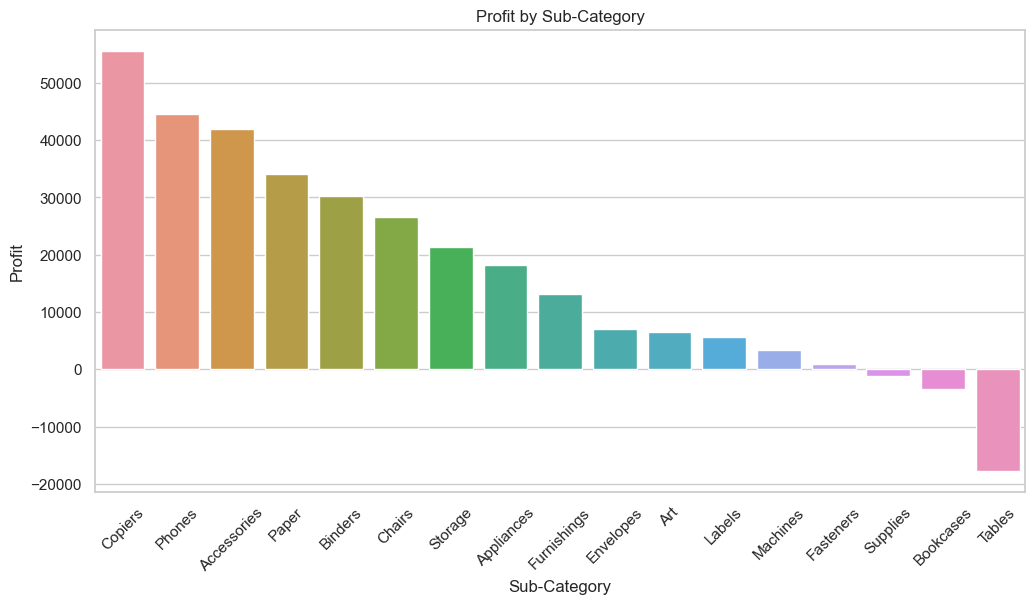

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_profit.index.get_level_values('Sub-Category'), y=category_profit['Profit'])
plt.xticks(rotation=45)
plt.title('Profit by Sub-Category')
plt.show()

# 5.*Inventory Turnover Analysis*

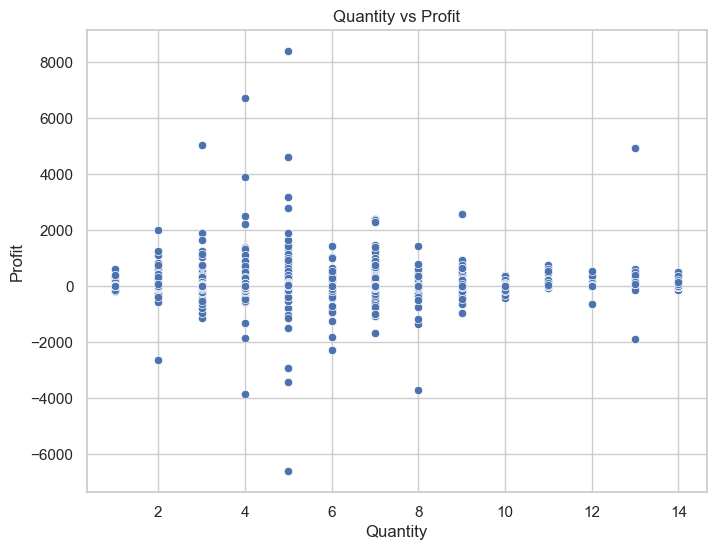

In [46]:
# Quantity vs Profit Analysis
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Quantity', y='Profit')
plt.title('Quantity vs Profit')
plt.show()

# 6.*Regional Performance*

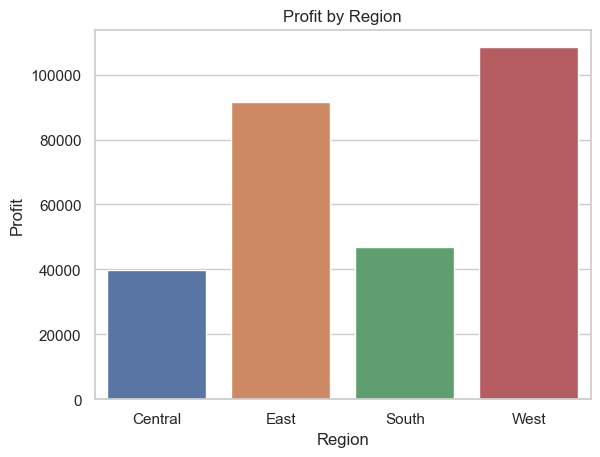

In [48]:
# Region-wise Profit Analysis
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

sns.barplot(data=region_sales, x='Region', y='Profit')
plt.title('Profit by Region')
plt.show()

# 7.*Seasonal Trends*

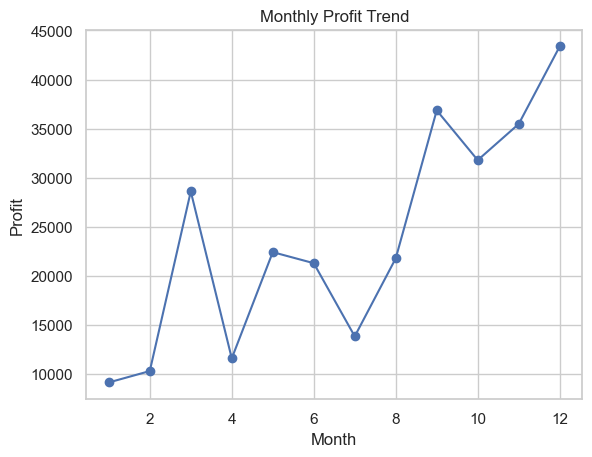

In [50]:
# Extract Month from Order Date
df['Order Month'] = df['Order Date'].dt.month

# Monthly Profit Trend
month_profit = df.groupby('Order Month')['Profit'].sum().reset_index()

plt.plot(month_profit['Order Month'], month_profit['Profit'], marker='o')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# 8.*Correlation Matrix*

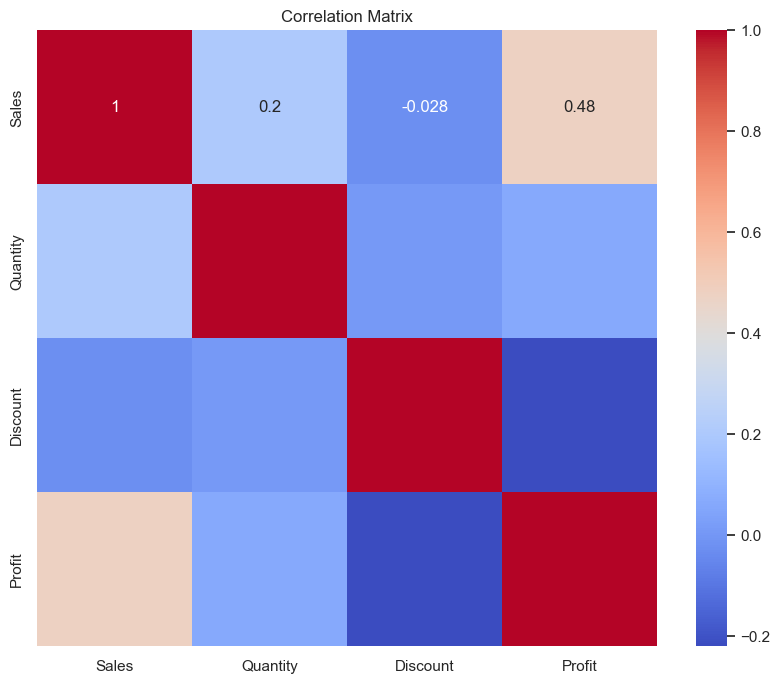

In [52]:

plt.figure(figsize=(10,8))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 9.*Conclusion*

#### Conclusion & Key Insights
- Technology category gives maximum profit.
- Tables sub-category is causing heavy loss.
- West region is the highest profitable region.
- High discounts are leading to reduced profitability.
- Need to optimize inventory for Office Supplies category.